
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**: 5 баллов

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [9]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [6]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

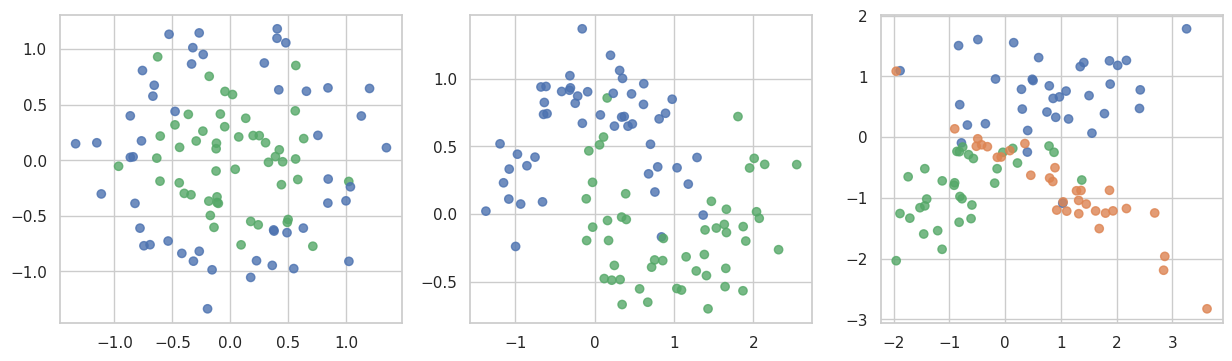

In [10]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [11]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

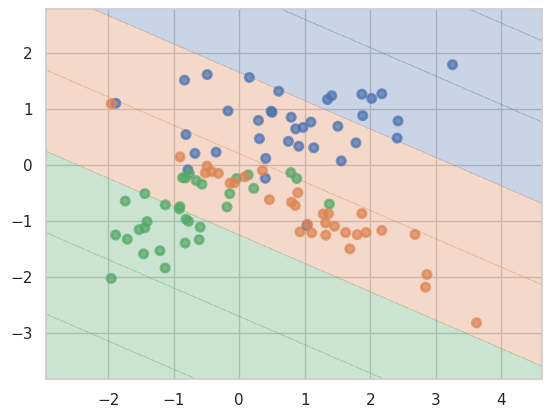

In [12]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
  Train Accuracy: 1.00
  Test Accuracy: 0.73



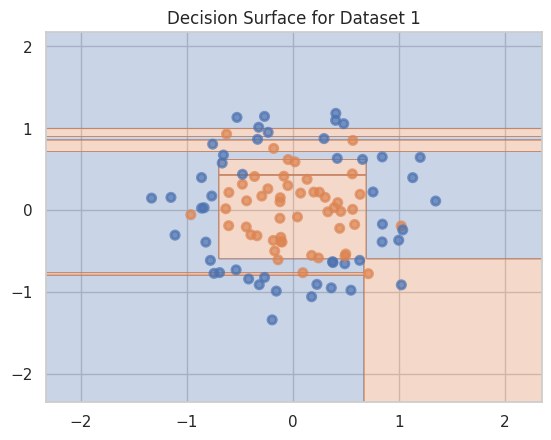

Dataset 2:
  Train Accuracy: 1.00
  Test Accuracy: 0.87



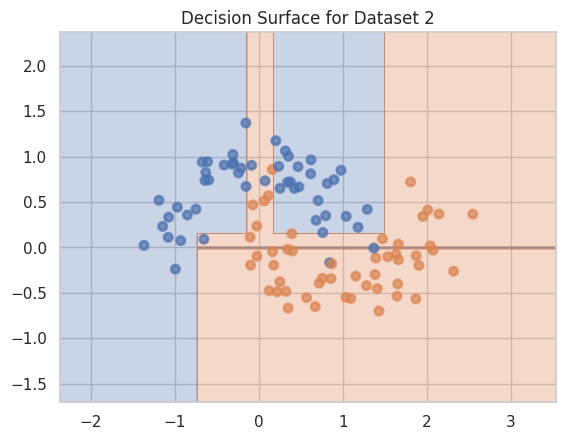

Dataset 3:
  Train Accuracy: 1.00
  Test Accuracy: 0.77



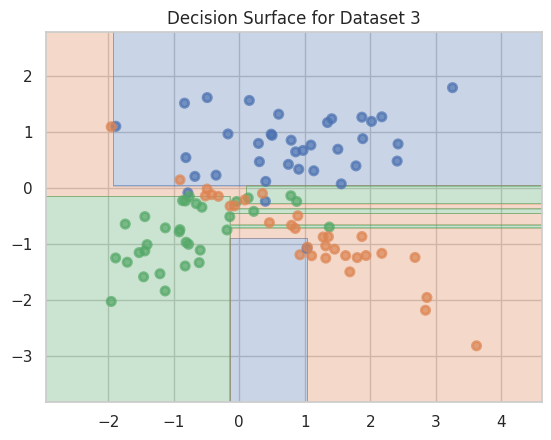

In [14]:
from sklearn.metrics import accuracy_score

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    print(f"Dataset {i+1}:")
    print(f"  Train Accuracy: {train_accuracy:.2f}")
    print(f"  Test Accuracy: {test_accuracy:.2f}")
    print()
    
    plt.figure()
    plot_surface(clf, X, y)
    plt.title(f"Decision Surface for Dataset {i+1}")
    plt.show()

__Ответ:__ Переобучились, но не то, чтобы сильно. Да, на первом графике кажется, что полосы сверху - лишнее, на втором уже лучше, а на третьем попытка разделения зелёных точек тоже такое себе, но в целом неплохо, я бы сказал (можно лучше)

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1, max_depth=3, min_samples_leaf=1:
  Train Accuracy: 0.89
  Test Accuracy: 0.73



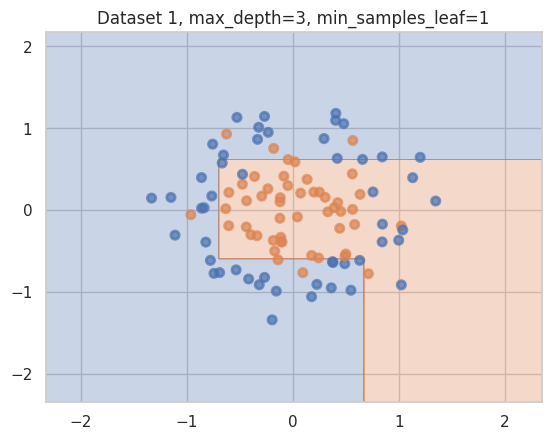

Dataset 1, max_depth=3, min_samples_leaf=3:
  Train Accuracy: 0.89
  Test Accuracy: 0.70



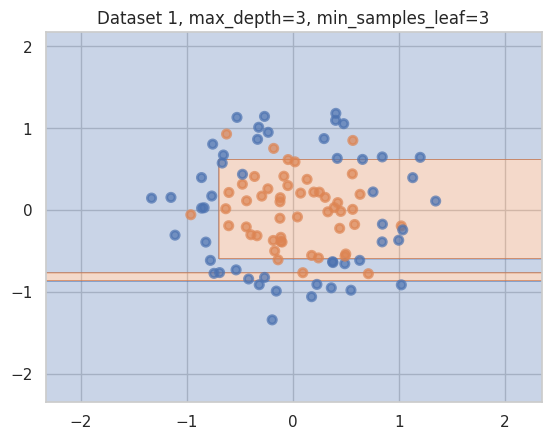

Dataset 1, max_depth=3, min_samples_leaf=5:
  Train Accuracy: 0.86
  Test Accuracy: 0.80



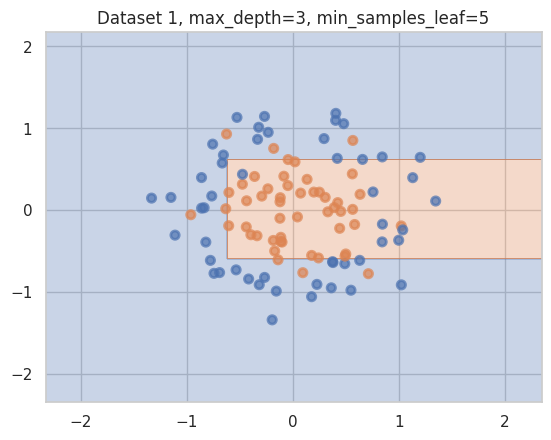

Dataset 1, max_depth=5, min_samples_leaf=1:
  Train Accuracy: 0.97
  Test Accuracy: 0.77



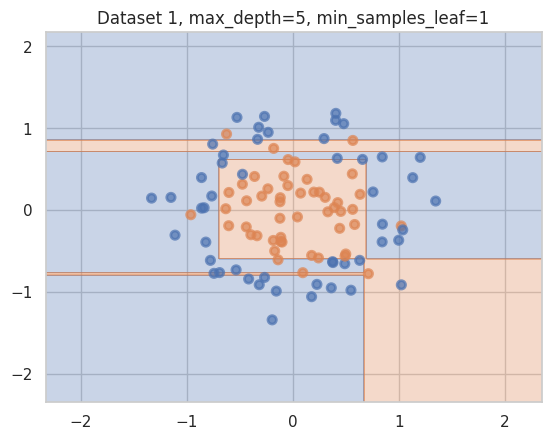

Dataset 1, max_depth=5, min_samples_leaf=3:
  Train Accuracy: 0.94
  Test Accuracy: 0.73



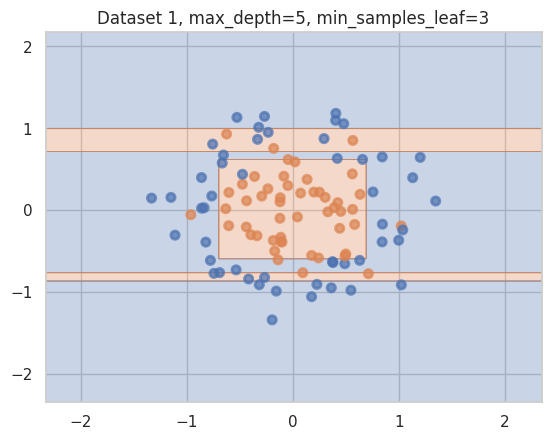

Dataset 1, max_depth=5, min_samples_leaf=5:
  Train Accuracy: 0.87
  Test Accuracy: 0.90



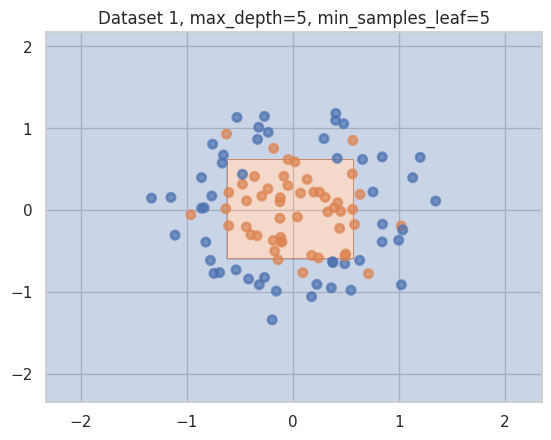

Dataset 1, max_depth=None, min_samples_leaf=1:
  Train Accuracy: 1.00
  Test Accuracy: 0.73



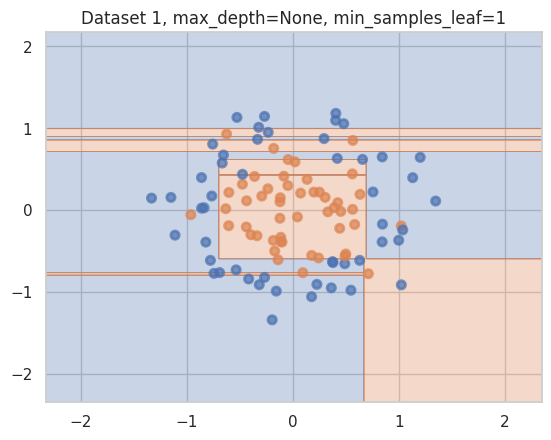

Dataset 1, max_depth=None, min_samples_leaf=3:
  Train Accuracy: 0.94
  Test Accuracy: 0.73



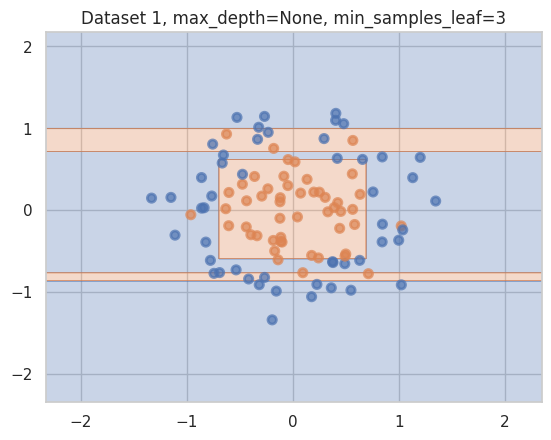

Dataset 1, max_depth=None, min_samples_leaf=5:
  Train Accuracy: 0.87
  Test Accuracy: 0.90



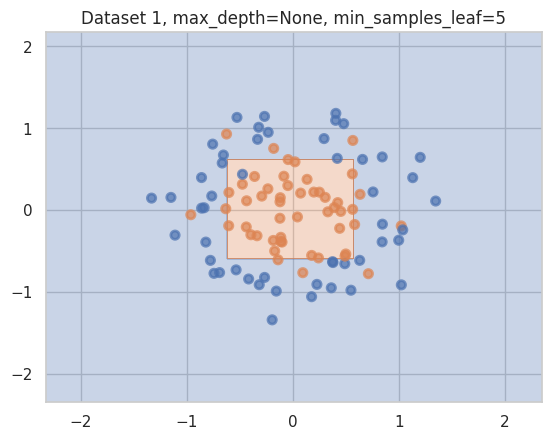

Dataset 2, max_depth=3, min_samples_leaf=1:
  Train Accuracy: 0.91
  Test Accuracy: 0.93



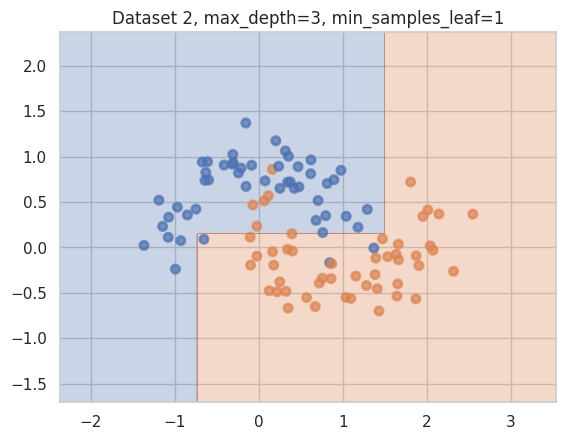

Dataset 2, max_depth=3, min_samples_leaf=3:
  Train Accuracy: 0.91
  Test Accuracy: 0.83



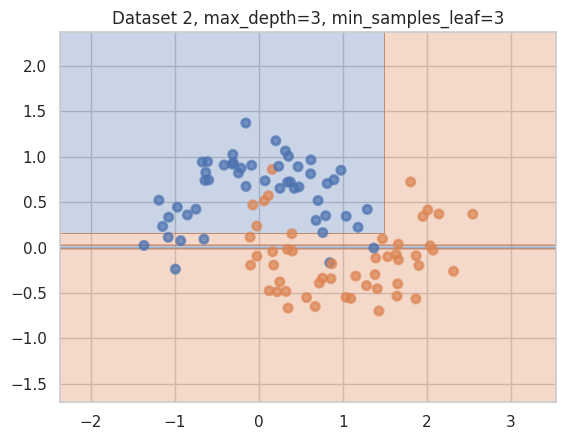

Dataset 2, max_depth=3, min_samples_leaf=5:
  Train Accuracy: 0.89
  Test Accuracy: 0.80



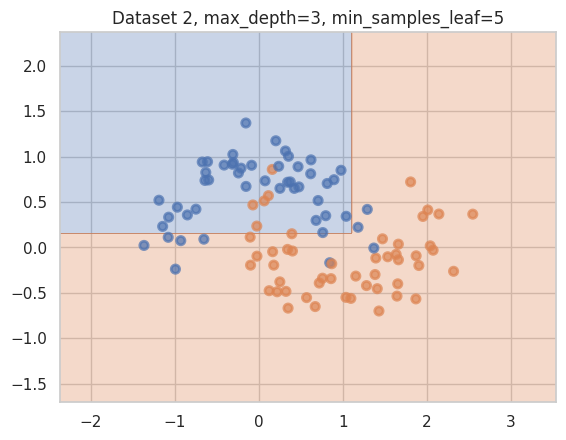

Dataset 2, max_depth=5, min_samples_leaf=1:
  Train Accuracy: 1.00
  Test Accuracy: 0.87



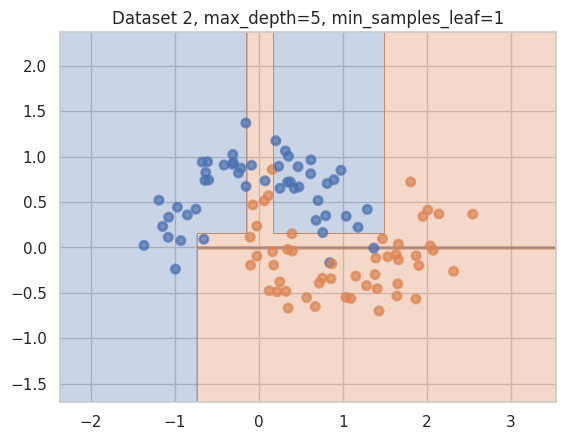

Dataset 2, max_depth=5, min_samples_leaf=3:
  Train Accuracy: 0.99
  Test Accuracy: 0.77



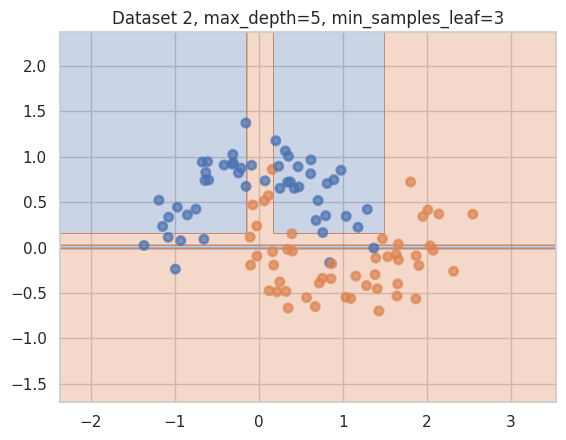

Dataset 2, max_depth=5, min_samples_leaf=5:
  Train Accuracy: 0.96
  Test Accuracy: 0.73



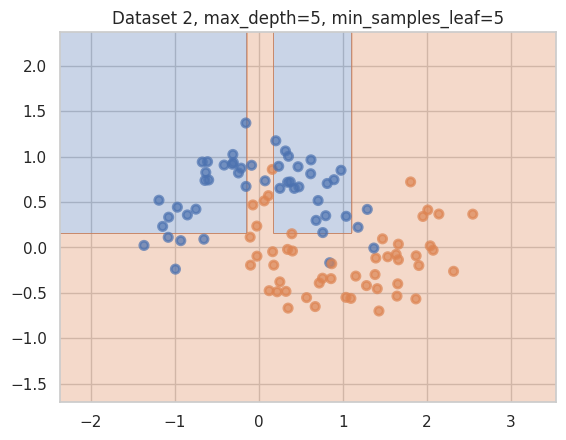

Dataset 2, max_depth=None, min_samples_leaf=1:
  Train Accuracy: 1.00
  Test Accuracy: 0.87



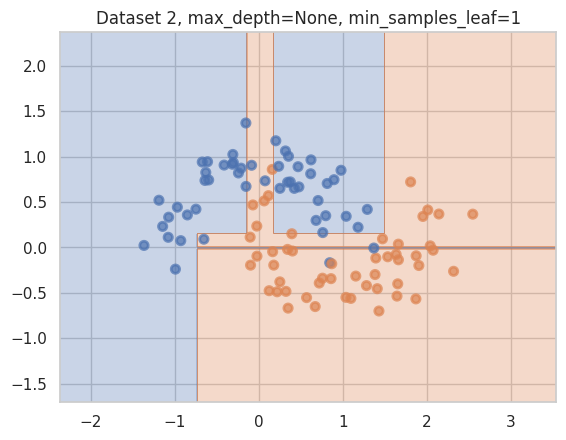

Dataset 2, max_depth=None, min_samples_leaf=3:
  Train Accuracy: 0.99
  Test Accuracy: 0.77



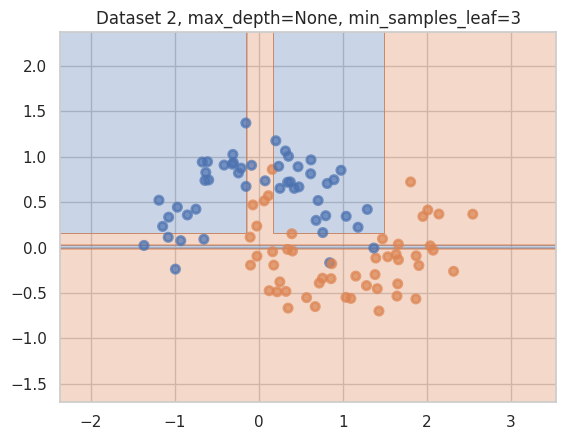

Dataset 2, max_depth=None, min_samples_leaf=5:
  Train Accuracy: 0.96
  Test Accuracy: 0.73



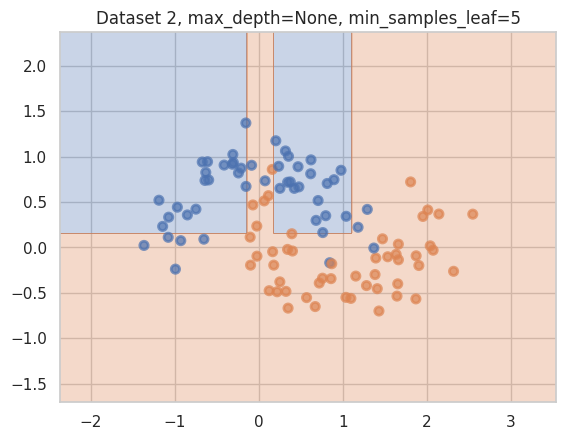

Dataset 3, max_depth=3, min_samples_leaf=1:
  Train Accuracy: 0.94
  Test Accuracy: 0.87



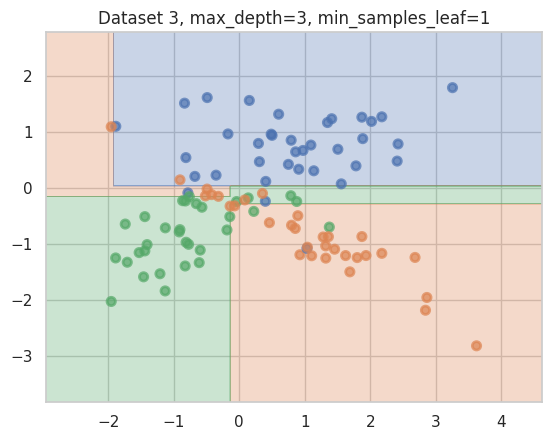

Dataset 3, max_depth=3, min_samples_leaf=3:
  Train Accuracy: 0.91
  Test Accuracy: 0.77



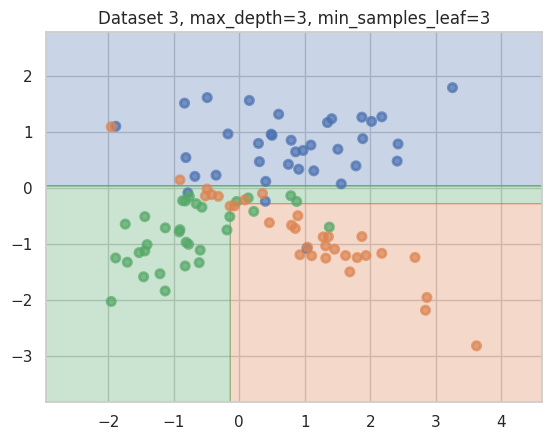

Dataset 3, max_depth=3, min_samples_leaf=5:
  Train Accuracy: 0.89
  Test Accuracy: 0.77



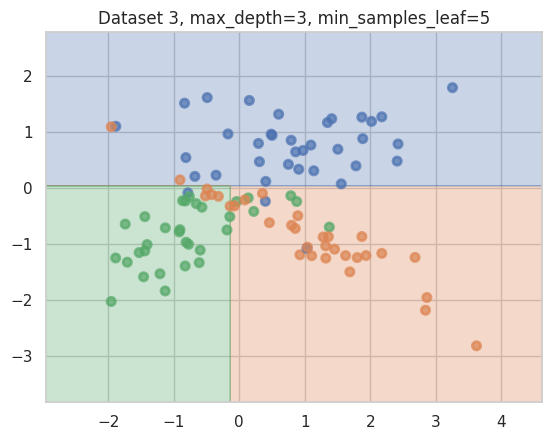

Dataset 3, max_depth=5, min_samples_leaf=1:
  Train Accuracy: 0.97
  Test Accuracy: 0.80



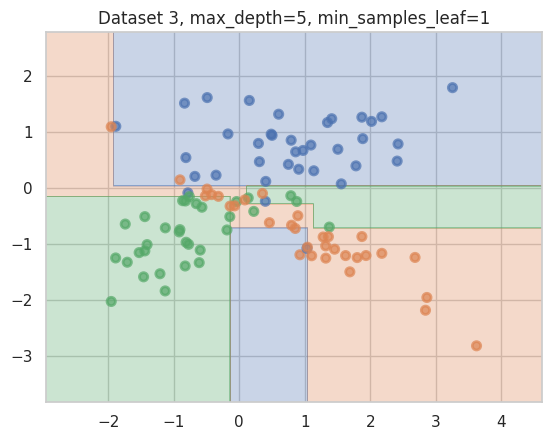

Dataset 3, max_depth=5, min_samples_leaf=3:
  Train Accuracy: 0.91
  Test Accuracy: 0.77



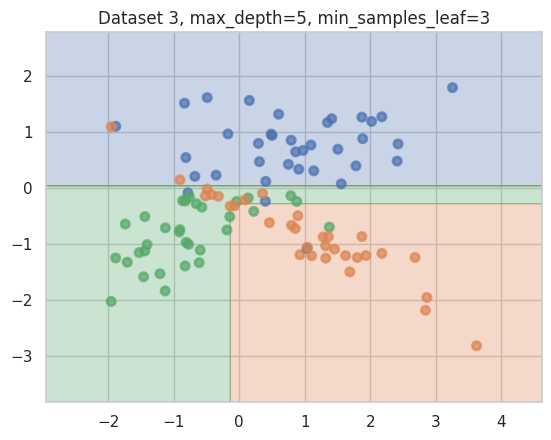

Dataset 3, max_depth=5, min_samples_leaf=5:
  Train Accuracy: 0.90
  Test Accuracy: 0.70



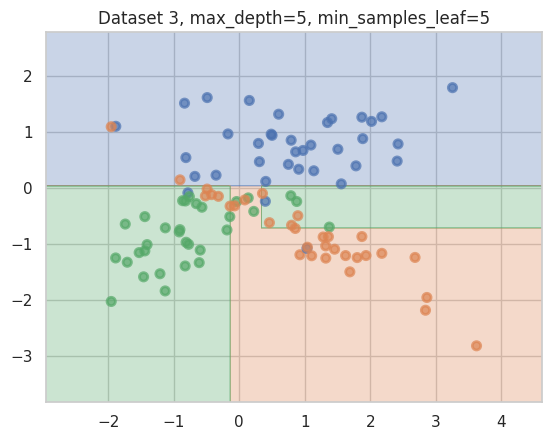

Dataset 3, max_depth=None, min_samples_leaf=1:
  Train Accuracy: 1.00
  Test Accuracy: 0.83



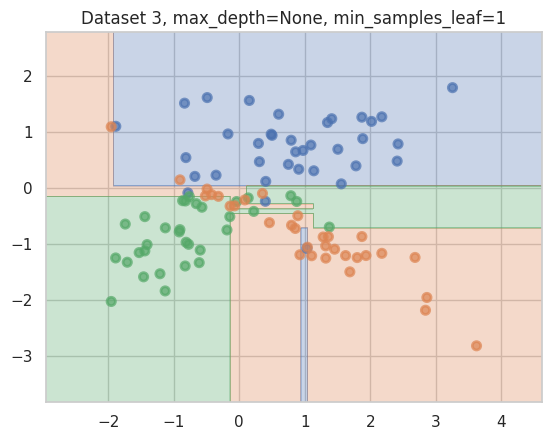

Dataset 3, max_depth=None, min_samples_leaf=3:
  Train Accuracy: 0.91
  Test Accuracy: 0.77



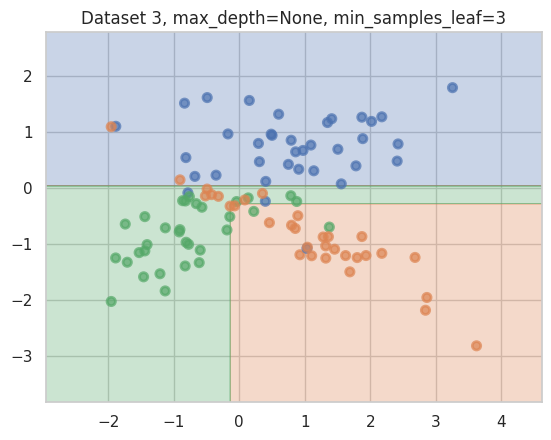

Dataset 3, max_depth=None, min_samples_leaf=5:
  Train Accuracy: 0.90
  Test Accuracy: 0.70



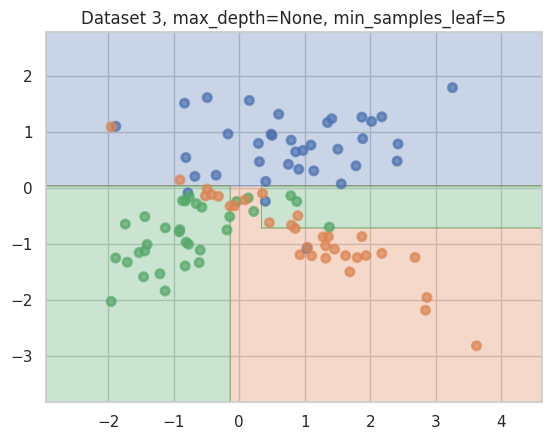

In [15]:
max_depths = [3, 5, None]
min_samples_leaves = [1, 3, 5]

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))
            
            print(f"Dataset {i+1}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}:")
            print(f"  Train Accuracy: {train_accuracy:.2f}")
            print(f"  Test Accuracy: {test_accuracy:.2f}")
            print()
            
            plt.figure()
            plot_surface(clf, X, y)
            plt.title(f"Dataset {i+1}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
            plt.show()

__Ответ:__ У всех датасетов одна и та же тенденция: чем больше min_samples_leaf, тем больше области на графике, аналогично же с max_depth, только там, чем меньше max_depth. При неограниченной высоте и минимальном допустимом кол-ве элементов в листе единичкой мы переобучимся на 100%. Лучшую точность дают вариации, ограниченные адекватно и глубиной, и кол-вом жлементов в узле

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [2]:
import pandas as pd

data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


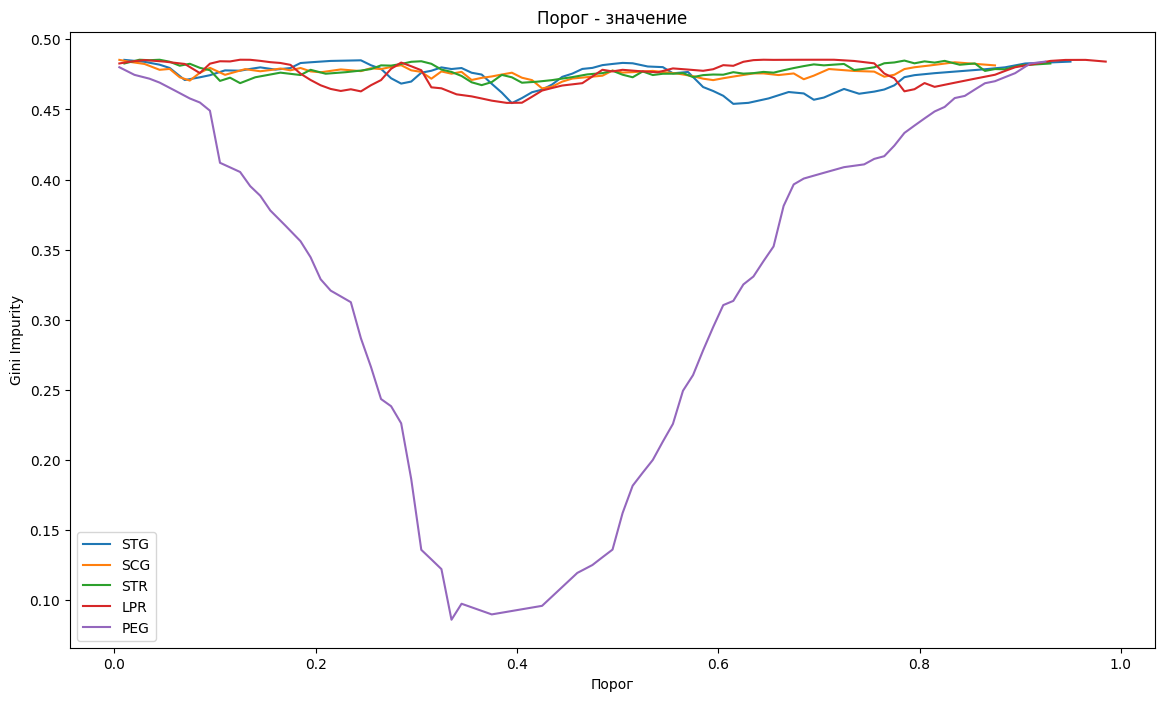

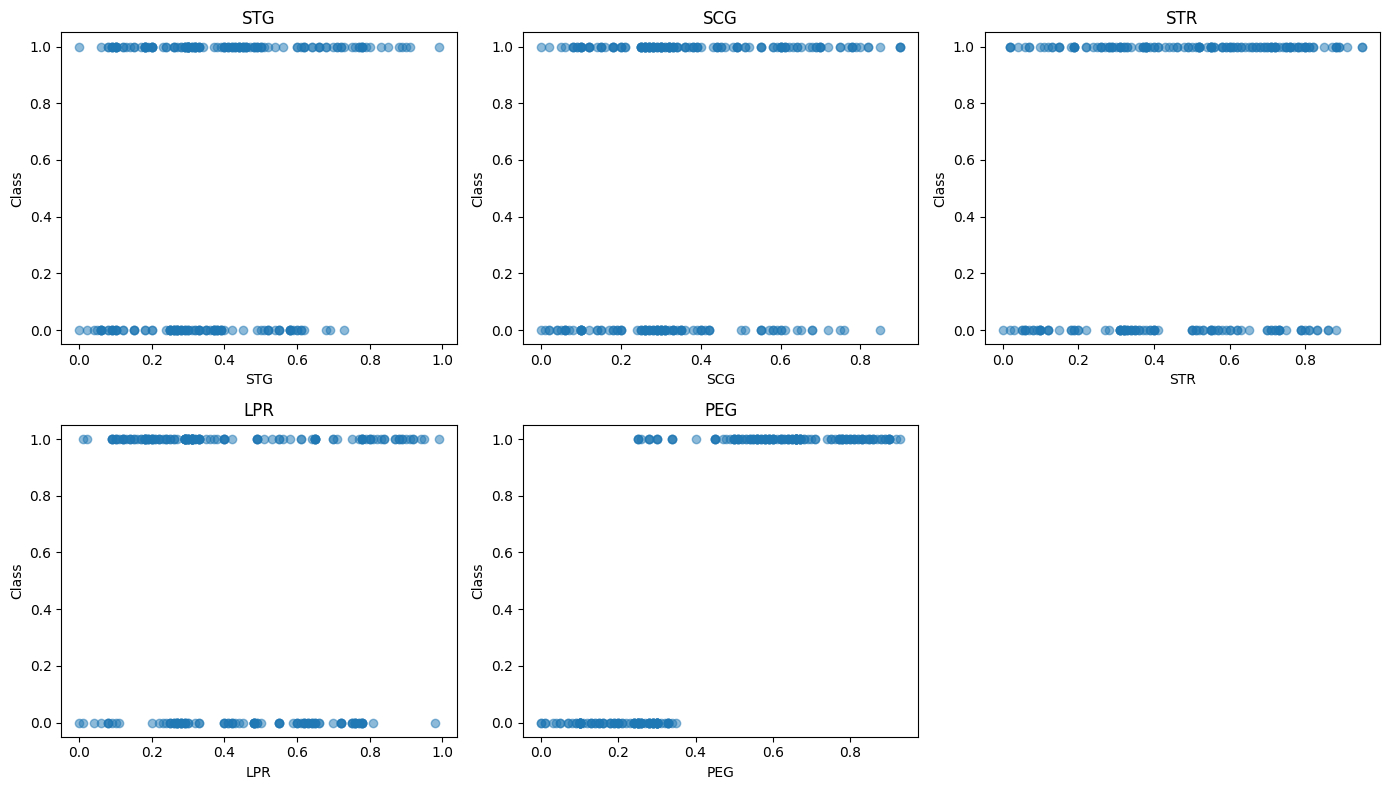

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tree_code import find_best_split

features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values
thresholds_list = []
ginis_list = []

for i in range(features.shape[1]):
    result = find_best_split(features[:, i], target)
    thresholds, ginis, _, _ = result
    thresholds_list.append(thresholds)
    ginis_list.append(ginis)

plt.figure(figsize=(14, 8))

for i in range(len(thresholds_list)):
    plt.plot(thresholds_list[i], ginis_list[i], label=data.columns[i])

plt.xlabel('Порог')
plt.ylabel('Gini Impurity')
plt.title('Порог - значение')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))

for i in range(features.shape[1]):
    plt.subplot(2, 3, i+1)
    plt.scatter(features[:, i], target, alpha=0.5)
    plt.xlabel(data.columns[i])
    plt.ylabel('Class')
    plt.title(f'{data.columns[i]}')

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

***Из графиков заметно, что признак PEG является безальтернативно лучшим, по нему и стоит разделить выборку на поддеревья, это выбор однозначно подтверждается scatter-графиками. Лучшая кривая признаков, это та, что на определенном пороге стремиться к нулю, формирую впадину, худшая - та, что аппроксимирует прямую сверху***

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




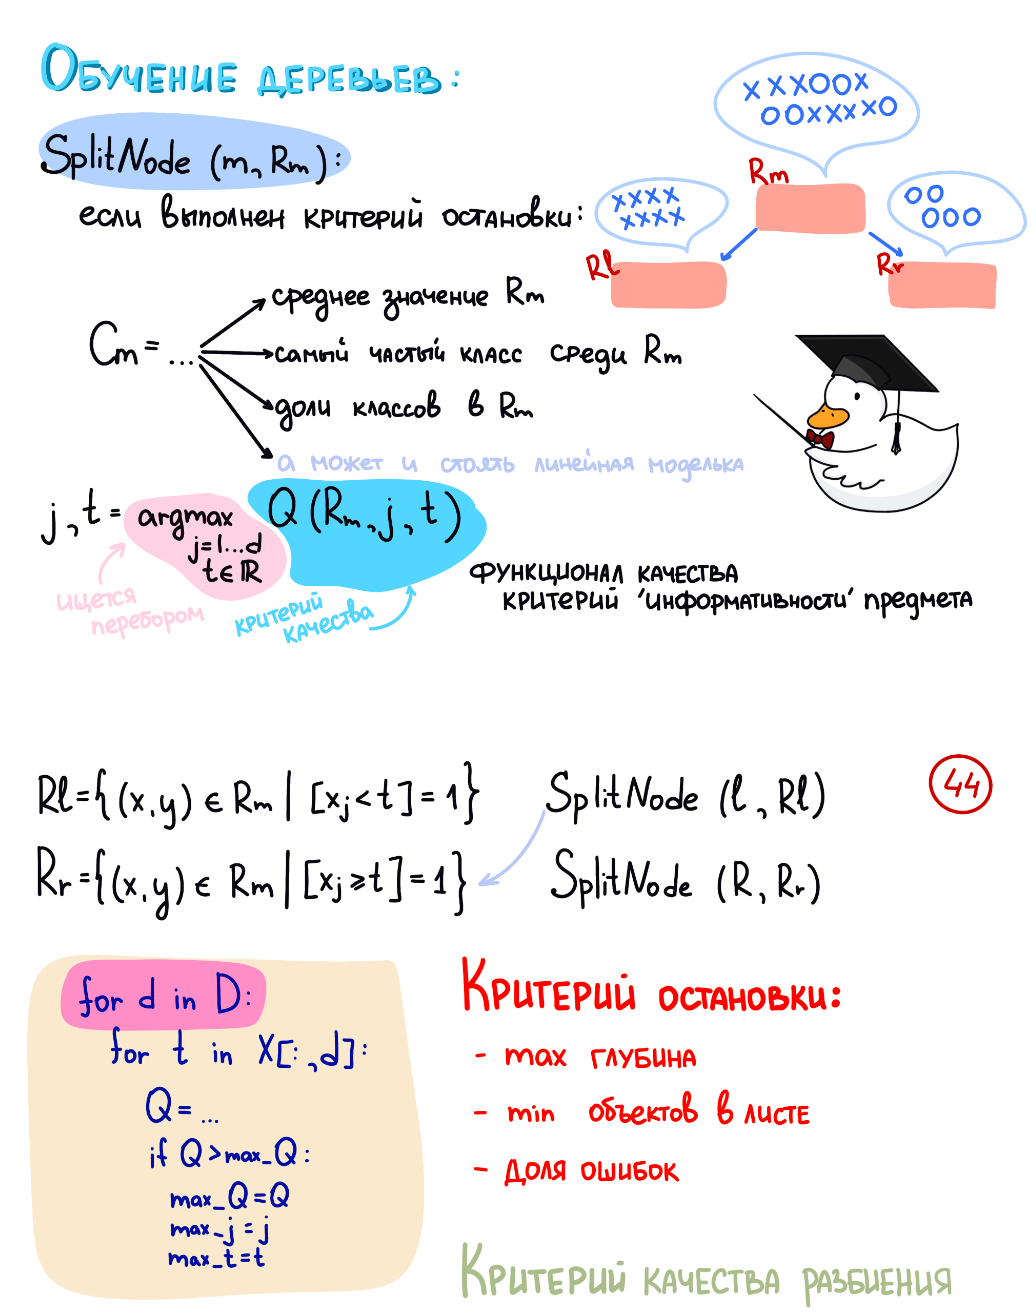

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tree_code import DecisionTree

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
]

data = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from tree_code import DecisionTree

column_names = {
    'mushrooms': [
        'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 
        'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
        'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
    ],
    'cars': [
        'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'
    ],
    'nursery': [
        'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 
        'health', 'class'
    ]
}

data_files = {
    'mushrooms': 'agaricus-lepiota.data',
    'tic-tac-toe': 'tic-tac-toe-endgame.csv',
    'cars': 'car.data',
    'nursery': 'nursery.data'
}

datasets = {}
for name in data_files:
    if name == 'tic-tac-toe':
        datasets[name] = pd.read_csv(data_files[name], header=0)
    else:
        datasets[name] = pd.read_csv(data_files[name], header=None, names=column_names.get(name))

datasets['cars']['class'] = datasets['cars']['class'].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
datasets['nursery']['class'] = datasets['nursery']['class'].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})

def encode_dataset(df):
    le = LabelEncoder()
    for column in df.columns:
        df[column] = le.fit_transform(df[column])
    return df

for name in datasets:
    datasets[name] = encode_dataset(datasets[name])

X_y_data = {}
for name, dataset in datasets.items():
    if name == 'mushrooms':
        X_y_data[name] = (dataset.iloc[:, 1:].values, dataset.iloc[:, 0].values)
    else:
        X_y_data[name] = (dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values)

def evaluate_algorithm(name, X, y, algorithm, feature_types=None):
    if algorithm == 'custom_real':
        tree = DecisionTree(feature_types=['real'] * X.shape[1])
    elif algorithm == 'custom_categorical':
        tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
    elif algorithm == 'custom_onehot':
        column_transformer = ColumnTransformer(
            transformers=[('onehot', OneHotEncoder(sparse_output=False), list(range(X.shape[1])))]
        )
        X_transformed = column_transformer.fit_transform(X)
        tree = DecisionTree(feature_types=['real'] * X_transformed.shape[1])
        return cross_val_score(tree, X_transformed, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    elif algorithm == 'sklearn':
        tree = DecisionTreeClassifier()
    else:
        raise ValueError("Unsupported algorithm")
    
    return cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

results = pd.DataFrame(index=['mushrooms', 'tic-tac-toe', 'cars', 'nursery'], columns=['custom_real', 'custom_categorical', 'custom_onehot', 'sklearn'])

for name, (X, y) in X_y_data.items():
    for algorithm in results.columns:
        results.loc[name, algorithm] = evaluate_algorithm(name, X, y, algorithm)

print(results)

            custom_real custom_categorical custom_onehot   sklearn
mushrooms      0.999261                1.0      0.999631  0.961123
tic-tac-toe    0.467533           0.541458      0.543575  0.783158
cars           0.942647           0.967546      0.919495  0.943285
nursery        0.999691           0.999846      0.999537  0.999691


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


***В наборах данных, где большинство признаков являются категориальными, алгоритмы, которые правильно обрабатывают категориальные признаки (custom_categorical и custom_onehot), показывают лучшие результаты. Вот в tic-tac-toe скорее всего есть случайная компонента, которая создаёт шум. У sklearn лучше результат, так как он использует в коробке методы регуляризации***

# Как дела?

***Хочу не меньше 4 за экзамен:(***